Proyek Kedua : Membuat Model Machine Learning dengan Data Time Series

Nama : Ela Diranda Pahira

email : eladiranda@gmail.com

Domisili : Kalianda, Lampung Selatan

In [1]:
#Import Dataset From Kaggle
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riturajdutta","key":"f51cb1396a1eaa532cef82ba012f8118"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-07-31 06:29:52          10014  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6137  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2289  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2532  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [42]:
#Download File Dataset
!kaggle datasets download -d mahirkukreja/delhi-weather-data

  0% 0.00/1.00M [00:00<?, ?B/s]
100% 1.00M/1.00M [00:00<00:00, 69.5MB/s]


In [43]:
!mkdir delhi-weather-data
!unzip delhi-weather-data.zip -d delhi-weather-data
!ls delhi-weather-data

Archive:  delhi-weather-data.zip
  inflating: delhi-weather-data/testset.csv  
testset.csv


In [44]:
#Load Dataset
import pandas as pd
df = pd.read_csv('delhi-weather-data/testset.csv')
df.head(10)

datetime_utc  _conds   _dewptm  ...   _wgustm   _windchillm   _wspdm
0  19961101-11:00   Smoke       9.0  ...       NaN           NaN      7.4
1  19961101-12:00   Smoke      10.0  ...       NaN           NaN      NaN
2  19961101-13:00   Smoke      11.0  ...       NaN           NaN      NaN
3  19961101-14:00   Smoke      10.0  ...       NaN           NaN      NaN
4  19961101-16:00   Smoke      11.0  ...       NaN           NaN      0.0
5  19961101-17:00   Smoke      12.0  ...       NaN           NaN      NaN
6  19961101-18:00   Smoke      13.0  ...       NaN           NaN      0.0
7  19961101-19:00   Smoke      13.0  ...       NaN           NaN      NaN
8  19961101-20:00   Smoke      13.0  ...       NaN           NaN      NaN
9  19961101-21:00   Smoke      13.0  ...       NaN           NaN      NaN

[10 rows x 20 columns]

In [45]:
#Total Data
df.shape

(100990, 20)

In [46]:
#Info Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [47]:
#Null Check
df.isnull().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [79]:
#Pengisian Baris Null
df['datetime_utc']=pd.to_datetime(df['datetime_utc'])
df['datetime_utc'].head()
df[' _dewptm'].fillna(df[' _dewptm'].mean(), inplace=True)
df = df[['datetime_utc',' _dewptm' ]]
df.head()

datetime_utc   _dewptm
0 1996-11-01 11:00:00       9.0
1 1996-11-01 12:00:00      10.0
2 1996-11-01 13:00:00      11.0
3 1996-11-01 14:00:00      10.0
4 1996-11-01 16:00:00      11.0

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   datetime_utc  100990 non-null  datetime64[ns]
 1    _dewptm      100990 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 MB


In [57]:
#Model dan Plot
Delhi=df[['datetime_utc',' _dewptm']].copy()
Delhi['Date'] = Delhi['datetime_utc'].dt.date
Delhifinal=Delhi.drop('datetime_utc',axis=1)
Delhifinal.set_index('Date', inplace= True)
Delhifinal.head()

_dewptm
Date                
1996-11-01       9.0
1996-11-01      10.0
1996-11-01      11.0
1996-11-01      10.0
1996-11-01      11.0

In [59]:
Delhifinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100990 entries, 1996-11-01 to 2017-04-24
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0    _dewptm  100990 non-null  float64
dtypes: float64(1)
memory usage: 1.5+ MB


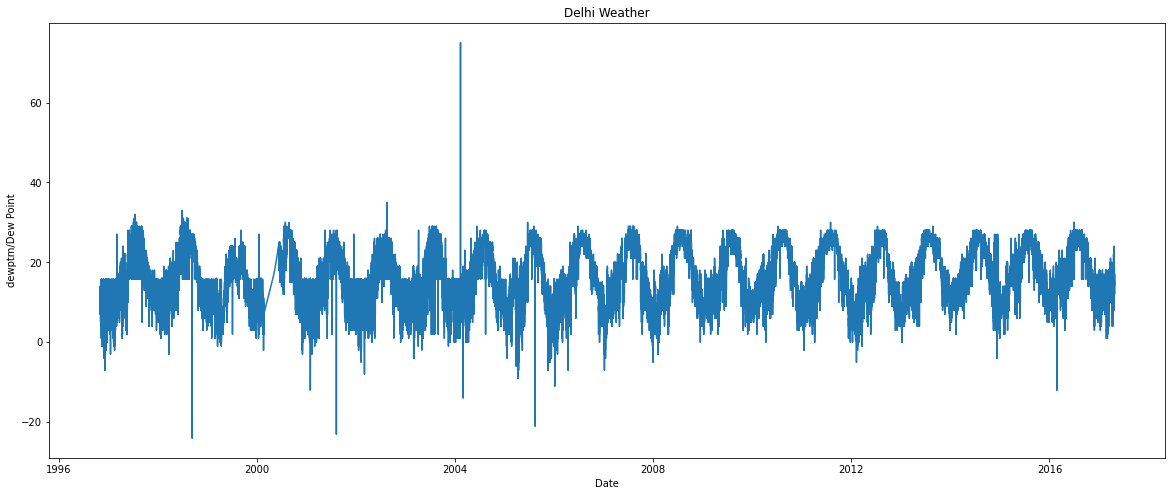

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(Delhifinal)
plt.title('Delhi Weather')
plt.xlabel('Date')
plt.ylabel('dewptm/Dew Point')
plt.show()

In [63]:
#Data Values
date = df['datetime_utc'].values
temp = df[' _dewptm'].values

In [64]:
import tensorflow as tf
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(temp, date, test_size = 0.2, random_state = 0 , shuffle=False)
print(len(x_train), len(x_test))

80792 20198


In [66]:
#Model
from keras.layers import Dense, LSTM
data_x_train = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=5000)
data_x_test = windowed_dataset(x_test, window_size=60, batch_size=100, shuffle_buffer=5000)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [67]:
max = df[' _dewptm'].max()
print('Max value : ' )
print(max)

Max value : 
75.0


In [68]:
min = df[' _dewptm'].min()
print('Min Value : ')
print(min)

Min Value : 
-24.0


In [69]:
x = (75.0 - (-24.0)) * (10 / 100)
print(x)

9.9


In [73]:
#Callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')< x):
      self.model.stop_training = True
      print("\nMAE of the model < 10% of data scale")
callbacks = myCallback()

In [75]:
tf.keras.backend.set_floatx('float64')
history = model.fit(data_x_train ,epochs=500, validation_data=data_x_test, callbacks=[callbacks])

Epoch 1/500
808/808 [==============================] - 117s 144ms/step - loss: 3.9286 - mae: 4.3940 - val_loss: 3.4071 - val_mae: 3.8698

MAE of the model < 10% of data scale


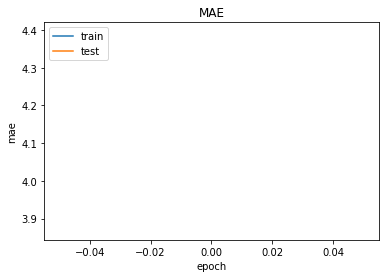

In [77]:
#Plot Mae
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

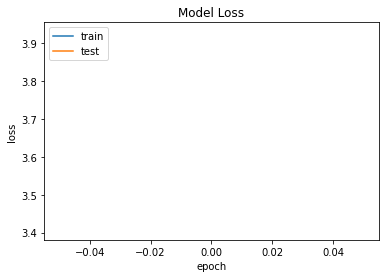

In [78]:
#Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()